In [1]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation, Dense, Flatten, Dropout
from keras.utils import to_categorical
from keras.optimizers import SGD
from keras.datasets import cifar10

Using TensorFlow backend.


In [2]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
import keras.backend
keras.backend.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [4]:
import matplotlib.pyplot as plt

### Load the CIFAR10 dataset

In [5]:
(X_train, y_train), (X_test, y_test)  = cifar10.load_data()

In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

                                 Show some of the images with labels

In [7]:
def get_label(label_as_np_array, label_dict):

    return label_dict[int(label_as_np_array)]

In [8]:
def plot_images(count, label_dict):
    list_of_labels = np.random.randint(y_train.shape[0], size=count)
    plt.figure(figsize=(int(1.5)* count, 2 * count))
    plt.tight_layout()

    for i in np.arange(0,count):
        # Subplot
        plt.subplot(count - 3, 3, i + 1, ymargin=1)
        # Label of the image
        label_as_np_array = y_train[list_of_labels[i]]
        plt.title(get_label(label_as_np_array, label_dict)+ '  ' + str(list_of_labels[i]))
        # Show the image
        image_to_show = X_train[list_of_labels[i]]
        plt.imshow(image_to_show)
        
    return plt.show()

                                              CIFAR10 labels

In [9]:
cifar10_labels = {
        0:"airplane",
        1:"automobile",
        2:"bird",
        3:"cat",
        4:"deer",
        5:"dog",
        6:"frog",
        7:"horse",
        8:"ship",
        9:"truck"
        }

                                           Normalize image input
                                           [0..255] ====> [0..1] 

In [10]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

                                    Convert labels to one-hot encoding

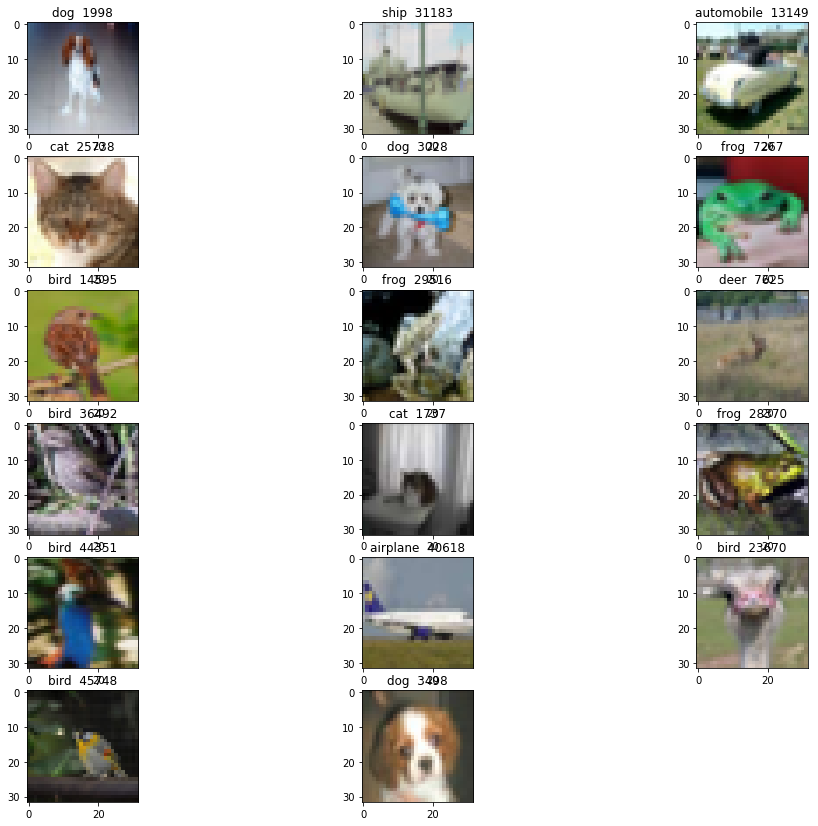

In [11]:
plot_images(count=17, label_dict=cifar10_labels)

In [12]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### AlexNet

INPUT => [CONV => RELU => POOL] * 2 => [CONV => RELU] * 3 => POOL => [FC => RELU => DO] * 2 => SOFTMAX

In [24]:
def alex_net(batch_size, learning_rate, num_epochs, num_classes, dataset=(X_train, y_train, X_test, y_test)):
    X_train, y_train, X_test, y_test = dataset
    model = Sequential()
    
    # Input => [CONV => RELU => POOL] * 2 => ...
    # First
    model.add(Conv2D(32,(3,3),input_shape = X_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    # Second
    model.add(Conv2D(64,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    # ... => [CONV => RELU] * 3
    # First
    model.add(Conv2D(64, (3,3)))
    model.add(Activation("relu"))
    # Second
    model.add(Conv2D(64, (3,3)))
    model.add(Activation("relu"))

    
    # ... => POOL => ...
    model.add(MaxPooling2D(pool_size=(2,2)))
    # ... => [FC => RELU => DO] * 2 => ...
    model.add(Flatten())
    # First
    model.add(Dense(512))
    model.add(Activation("relu"))
    model.add(Dropout(0.5))
    # Second
    model.add(Dense(512))
    model.add(Activation("relu"))
    model.add(Dropout(0.5))
    
    # ... => Softmax => Output
    model.add(Dense(num_classes))
    model.add(Activation("softmax"))
    
    # Compile and train the model
    model.compile(loss='categorical_crossentropy',
                  optimizer=SGD(learning_rate),
                  metrics = ["accuracy"])
    
    model.fit(X_train, y_train, 
              batch_size=batch_size, 
              epochs=num_epochs,
              validation_data=(X_test, y_test),
              shuffle=True)
        
    return model

In [14]:
def plot_results(model):
    plt.figure(figsize=(20,15))
    
    plt.subplot(221)
    plt.title("Losses")
    plt.grid()
    plt.legend(("Training losses", "Test losses"))
    plt.plot(np.arange(0,len(model.history["loss"])), model.history["loss"])
    plt.plot(np.arange(0,len(model.history["val_loss"])), model.history["val_loss"])
    
    plt.subplot(222)
    plt.title("Accuracy")
    plt.grid()
    plt.legend(("Training Accuracy", "Test Accuracy"))
    plt.plot(np.arange(0,len(model.history["acc"])), model.history["acc"])
    plt.plot(np.arange(0,len(model.history["val_acc"])), model.history["val_acc"])
    return plt.show()

In [25]:
t = alex_net(batch_size=32, learning_rate=0.003, num_epochs=100, num_classes=10, dataset=(X_train, y_train, X_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 10s 204us/step - loss: 2.3016 - acc: 0.1113 - val_loss: 2.2991 - val_acc: 0.1937
Epoch 2/100
50000/50000 [==============================] - 9s 184us/step - loss: 2.2962 - acc: 0.1589 - val_loss: 2.2877 - val_acc: 0.2112
Epoch 3/100
50000/50000 [==============================] - 10s 198us/step - loss: 2.2699 - acc: 0.1844 - val_loss: 2.2107 - val_acc: 0.1966
Epoch 4/100
50000/50000 [==============================] - 10s 190us/step - loss: 2.1279 - acc: 0.1912 - val_loss: 2.0485 - val_acc: 0.2260
Epoch 5/100
50000/50000 [==============================] - 9s 184us/step - loss: 2.0490 - acc: 0.2077 - val_loss: 1.9855 - val_acc: 0.2404
Epoch 6/100
50000/50000 [==============================] - 9s 187us/step - loss: 1.9761 - acc: 0.2255 - val_loss: 1.9872 - val_acc: 0.2452
Epoch 7/100
50000/50000 [==============================] - 9s 182us/step - loss: 1.9059 - acc: 0.2556 - val_loss:

50000/50000 [==============================] - 10s 190us/step - loss: 0.6878 - acc: 0.7585 - val_loss: 0.9464 - val_acc: 0.6795
Epoch 60/100
50000/50000 [==============================] - 10s 192us/step - loss: 0.6793 - acc: 0.7624 - val_loss: 0.9126 - val_acc: 0.6932
Epoch 61/100
50000/50000 [==============================] - 9s 186us/step - loss: 0.6705 - acc: 0.7656 - val_loss: 0.9118 - val_acc: 0.6872
Epoch 62/100
50000/50000 [==============================] - 9s 184us/step - loss: 0.6598 - acc: 0.7670 - val_loss: 0.9100 - val_acc: 0.6998
Epoch 63/100
50000/50000 [==============================] - 9s 184us/step - loss: 0.6461 - acc: 0.7753 - val_loss: 0.9698 - val_acc: 0.6734
Epoch 64/100
50000/50000 [==============================] - 9s 181us/step - loss: 0.6353 - acc: 0.7785 - val_loss: 0.9276 - val_acc: 0.6976
Epoch 65/100
50000/50000 [==============================] - 9s 189us/step - loss: 0.6270 - acc: 0.7817 - val_loss: 0.9602 - val_acc: 0.6819
Epoch 66/100
50000/50000 [=====

In [34]:
y_pred = t.predict(X_test, batch_size=128)

In [36]:
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74      1000
           1       0.77      0.83      0.80      1000
           2       0.64      0.52      0.58      1000
           3       0.55      0.42      0.48      1000
           4       0.65      0.57      0.61      1000
           5       0.66      0.56      0.61      1000
           6       0.51      0.93      0.66      1000
           7       0.86      0.60      0.71      1000
           8       0.77      0.82      0.79      1000
           9       0.74      0.80      0.77      1000

   micro avg       0.68      0.68      0.68     10000
   macro avg       0.69      0.68      0.67     10000
weighted avg       0.69      0.68      0.67     10000



In [43]:
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

In [42]:
import pandas as pd
import seaborn as sn

In [44]:
cm_df = pd.DataFrame(cm, index=[i for i in cifar10_labels.values()], columns = [c for c in cifar10_labels.values()])

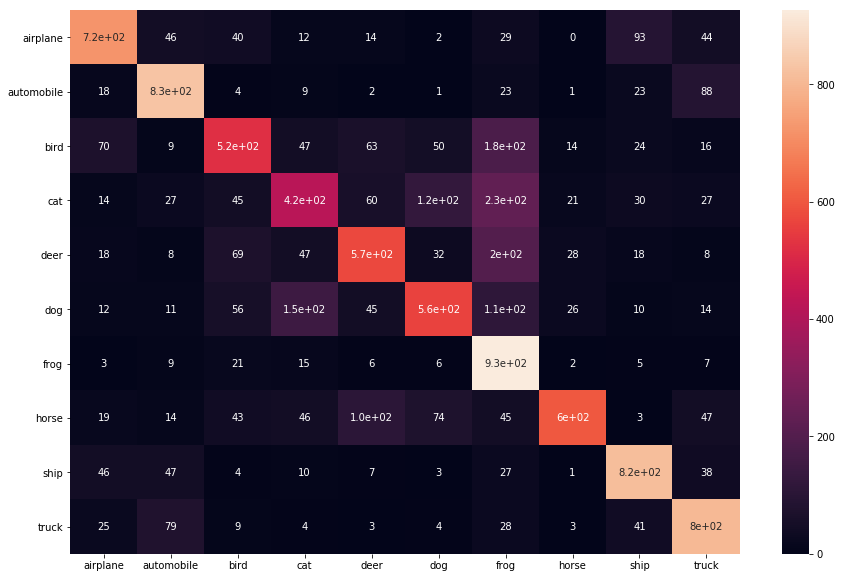

In [48]:
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
cm_df = pd.DataFrame(cm, index=[i for i in cifar10_labels.values()], columns = [c for c in cifar10_labels.values()])
plt.figure(figsize=(15,10))
sn.heatmap(cm_df, annot=True)
plt.show()

In [49]:
def output_results(count, model, X_test, y_test, batch_size, label_names=cifar10_labels):
    
    y_pred = model.predict(X_test, batch_size=batch_size)
    # Classification report
    print(len(y_pred))
    # Get random test examples
    list_of_labels = np.random.randint(len(y_pred), size=count)
    plt.figure(figsize=(int(1.5)* count, 2 * count))
    
    for i in np.arange(0,count):
        # Subplot
        plt.subplot(count - 3, 3, i + 1, ymargin=1)
        # Label of the image
        label_as_np_array = y_pred[list_of_labels[i]].argmax()
        plt.title(get_label(label_as_np_array, cifar10_labels))
        # Show the image
        image_to_show = X_test[list_of_labels[i]]
        plt.imshow(image_to_show)
    
    return plt.show()

### Another model similar to AlexNet, but without dense layers (Fully Convolutional)

INPUT => [CONV => RELU => POOL] * 2 => [CONV => RELU] * 3 => POOL => DO => SOFTMAX

In [50]:
def second_net(batch_size, learning_rate, num_epochs, num_classes, dataset=(X_train, y_train, X_test, y_test)):
    X_train, y_train, X_test, y_test = dataset
    model = Sequential()
    
    # Input => [CONV => RELU => POOL] * 2 => ...
    # First
    model.add(Conv2D(32,(3,3),input_shape = X_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    # Second
    model.add(Conv2D(64,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    # ... => [CONV => RELU] * 3
    # First
    model.add(Conv2D(128, (3,3)))
    model.add(Activation("relu"))
    # Second
    model.add(Conv2D(256, (3,3)))
    model.add(Activation("relu"))

    
    # ... => POOL => ...
    model.add(MaxPooling2D(pool_size=(2,2)))
    # ... => DO => ...
    model.add(Flatten())
    model.add(Dropout(0.5))
    
    # ... => Softmax => Output
    model.add(Dense(num_classes))
    model.add(Activation("softmax"))
    
    # Compile and train the model
    model.compile(loss='categorical_crossentropy',
                  optimizer=SGD(learning_rate),
                  metrics = ["accuracy"])
    
    model.fit(X_train, y_train, 
              batch_size=batch_size, 
              epochs=num_epochs,
              validation_data=(X_test, y_test),
              shuffle=True)
    
    output_results(18, model, X_test, y_test, 128)
    return model

CPU times: user 10 µs, sys: 2 µs, total: 12 µs
Wall time: 23.1 µs
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 149us/step - loss: 2.1267 - acc: 0.2067 - val_loss: 1.9597 - val_acc: 0.2863
Epoch 2/50
50000/50000 [==============================] - 7s 150us/step - loss: 1.8888 - acc: 0.3049 - val_loss: 1.7803 - val_acc: 0.3772
Epoch 3/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.6669 - acc: 0.3942 - val_loss: 1.5213 - val_acc: 0.4421
Epoch 4/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.5315 - acc: 0.4450 - val_loss: 1.4771 - val_acc: 0.4670
Epoch 5/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.4335 - acc: 0.4840 - val_loss: 1.3608 - val_acc: 0.5152
Epoch 6/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.3484 - acc: 0.5202 - val_loss: 1.2927 - val_acc: 0.5367
Epoch 7/50
50000/50000 [==============================] 

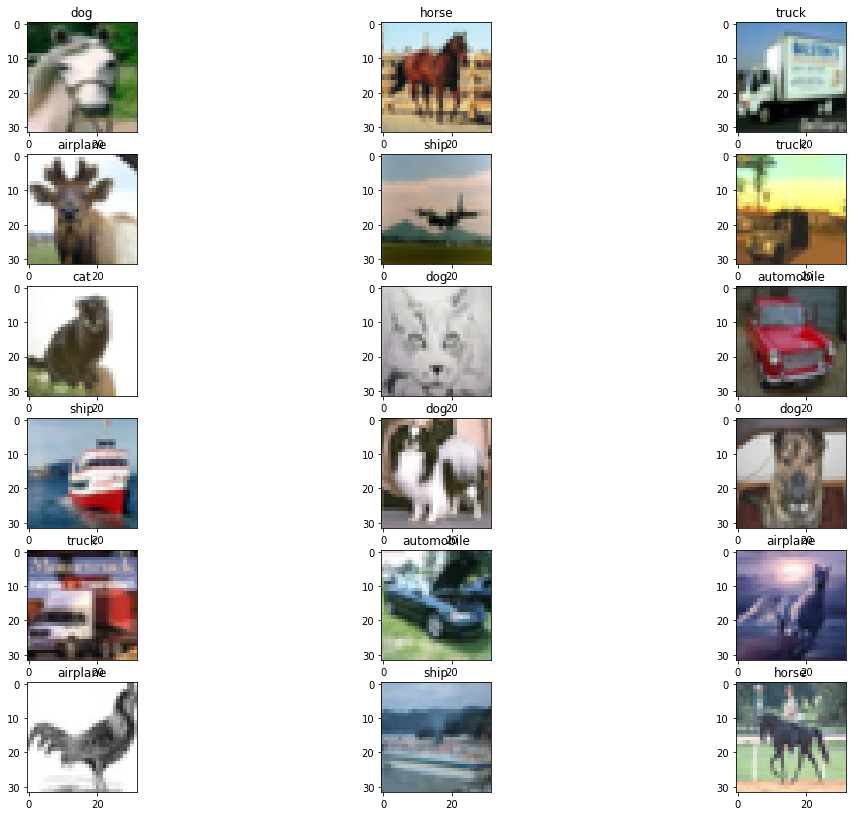

In [51]:
%time
t2 = second_net(batch_size=32, learning_rate=0.01, num_epochs=50, num_classes=10, dataset=(X_train, y_train, X_test, y_test))

In [55]:
y_pred = t.predict(X_test, batch_size=128)
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1), target_names=cifar10_labels.values()))

              precision    recall  f1-score   support

    airplane       0.76      0.72      0.74      1000
  automobile       0.77      0.83      0.80      1000
        bird       0.64      0.52      0.58      1000
         cat       0.55      0.42      0.48      1000
        deer       0.65      0.57      0.61      1000
         dog       0.66      0.56      0.61      1000
        frog       0.51      0.93      0.66      1000
       horse       0.86      0.60      0.71      1000
        ship       0.77      0.82      0.79      1000
       truck       0.74      0.80      0.77      1000

   micro avg       0.68      0.68      0.68     10000
   macro avg       0.69      0.68      0.67     10000
weighted avg       0.69      0.68      0.67     10000



In [58]:
confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

array([[720,  46,  40,  12,  14,   2,  29,   0,  93,  44],
       [ 18, 831,   4,   9,   2,   1,  23,   1,  23,  88],
       [ 70,   9, 524,  47,  63,  50, 183,  14,  24,  16],
       [ 14,  27,  45, 421,  60, 123, 232,  21,  30,  27],
       [ 18,   8,  69,  47, 572,  32, 200,  28,  18,   8],
       [ 12,  11,  56, 150,  45, 563, 113,  26,  10,  14],
       [  3,   9,  21,  15,   6,   6, 926,   2,   5,   7],
       [ 19,  14,  43,  46, 105,  74,  45, 604,   3,  47],
       [ 46,  47,   4,  10,   7,   3,  27,   1, 817,  38],
       [ 25,  79,   9,   4,   3,   4,  28,   3,  41, 804]])

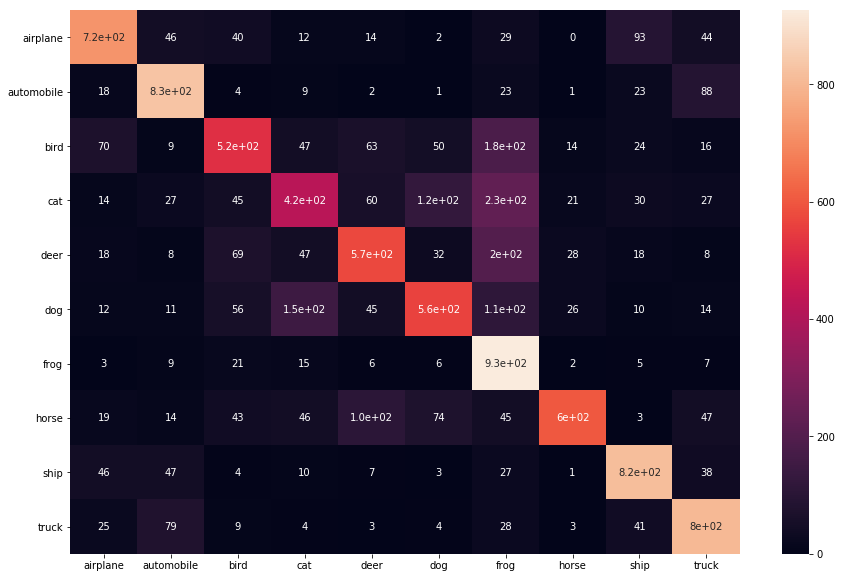

In [59]:
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
cm_df = pd.DataFrame(cm, index=[i for i in cifar10_labels.values()], columns = [c for c in cifar10_labels.values()])
plt.figure(figsize=(15,10))
sn.heatmap(cm_df, annot=True)
plt.show()